In [1]:
#importing required libraries 

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

# 1 . Reading and Understanding the loan data
### 1.1 Importing Dataset

In [4]:
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 1.2 Understanding the data set

In [6]:
df.shape

(39717, 111)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [9]:
df.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [10]:
# Checking the numeric variables of the dataframes
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# 2. Data Cleaning and Manipulation

### 2.1 Null Values checking in data

In [13]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
df.isnull().sum()*100/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [15]:
#checking how many null values are present in each of the columns

#creating a function to find null values for the dataframe

def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [16]:
null_values(df)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

### 2.1.1 Dealing with Null values more than  40% or 50 %

In [18]:
#creating a variable null_col_50 for storing null columns having missing values more than 50%
null_col_50 = null_values(df)[null_values(df)>50]

In [19]:
#revieving null_col_50

print(null_col_50)
print()
print("Num of columns having missing values more than 50% :",len(null_col_50))

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [20]:
null_col_50.index

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [21]:
null_percentage = df.isnull().sum()/len(df) * 100
null_percentage.sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [22]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [23]:
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [43]:
df.drop(columns = null_col_50.index, inplace = True)

In [45]:
df.shape

(39717, 54)

In [47]:
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [49]:
df.isnull().sum()*100/len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [61]:
df.shape

(39717, 54)

In [73]:
null_columns_dropped_data = df.drop(['desc', 'member_id', 'id', 'url'], axis=1)

In [75]:
## Deleting column having all values as same. So not adding any importance in analysis
null_columns_dropped_data = null_columns_dropped_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [77]:
df.shape

(39717, 54)

In [79]:
## Deleting string columns having most of as unique values
null_columns_dropped_data = null_columns_dropped_data.drop(['emp_title'], axis=1)

In [81]:
## Check percentage of missing data
((null_columns_dropped_data.isnull().sum() * 100 / len(null_columns_dropped_data)).sort_values(
    ascending=False)).head(11)

emp_length              2.706650
pub_rec_bankruptcies    1.754916
last_pymnt_d            0.178765
revol_util              0.125891
title                   0.027696
last_credit_pull_d      0.005036
total_pymnt             0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
out_prncp               0.000000
dtype: float64

In [83]:
null_columns_dropped_data.shape

(39717, 40)

## Identify Categorical Columns

In [88]:
df = []
for row in null_columns_dropped_data.columns.tolist():
    df.append({'column': row, 'count': len(null_columns_dropped_data[row].unique())})

In [90]:
unique = pd.DataFrame(df).sort_values('count')

In [92]:
unique.head(19)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5
9,home_ownership,5
6,grade,7
21,inq_last_6mths,9
19,delinq_2yrs,11
8,emp_length,12


## Creating derived columns

In [97]:
null_columns_dropped_data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0


In [99]:
# null_columns_dropped_data[null_columns_dropped_data.isnull().sum(axis=1) >= 2]
null_columns_dropped_data['term_months'] = null_columns_dropped_data['term'].str.rstrip('months')
del null_columns_dropped_data['term']

In [101]:
null_columns_dropped_data['int_rate_percentage'] = null_columns_dropped_data['int_rate'].str.rstrip('%')
del null_columns_dropped_data['int_rate']

In [103]:
# Remove 'years ' from 'emp_length' and create 'emp_length_years'
null_columns_dropped_data['emp_length_years'] = null_columns_dropped_data['emp_length'].str.rstrip(' years')

# Replace '10+' with '10' in 'emp_length_years'
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)

# Replace '< 1' with '0.5' in 'emp_length_years'
null_columns_dropped_data.loc[null_columns_dropped_data['emp_length_years'] == '< 1', 'emp_length_years'] = '0.5'

# Delete the original 'emp_length' column
del null_columns_dropped_data['emp_length']

In [105]:
null_columns_dropped_data['revol_util_percentage'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
del null_columns_dropped_data['revol_util']

In [107]:
# Splitting 'issue_d' into 'issue_d_month' and 'issue_d_year'
null_columns_dropped_data[['issue_d_month', 'issue_d_year']] = null_columns_dropped_data['issue_d'].str.split('-', expand=True)

# Splitting 'last_credit_pull_d' into 'last_credit_pull_d_month' and 'last_credit_pull_d_year'
null_columns_dropped_data[['last_credit_pull_d_month', 'last_credit_pull_d_year']] = null_columns_dropped_data['last_credit_pull_d'].str.split('-', expand=True)

# Splitting 'last_pymnt_d' into 'last_pymnt_d_month' and 'last_pymnt_d_year'
null_columns_dropped_data[['last_pymnt_d_month', 'last_pymnt_d_year']] = null_columns_dropped_data['last_pymnt_d'].str.split('-', expand=True)

# Splitting 'earliest_cr_line' into 'earliest_cr_line_month' and 'earliest_cr_line_year'
null_columns_dropped_data[['earliest_cr_line_month', 'earliest_cr_line_year']] = null_columns_dropped_data['earliest_cr_line'].str.split('-', expand=True)

In [109]:
null_columns_dropped_data['issue_d_year'] = '20' + null_columns_dropped_data['issue_d_year']

In [115]:


columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
    'emp_length_years', 'dti', 'revol_bal', 'out_prncp', 'out_prncp_inv', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
    'int_rate_percentage', 'revol_util_percentage'
]

null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(float)


In [117]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(
    null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt']
)*100/null_columns_dropped_data['funded_amnt']

In [121]:
null_columns_dropped_data['loan_inc_ratio'] = null_columns_dropped_data.funded_amnt*100/null_columns_dropped_data.annual_inc

In [123]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(int)


In [125]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [127]:
null_columns_dropped_data['annual_inc_lakhs'] = null_columns_dropped_data['annual_inc'] / 1000

In [129]:
null_columns_dropped_data['annual_inc_lakhs'].describe()

count    39717.000000
mean        68.968926
std         63.793766
min          4.000000
25%         40.404000
50%         59.000000
75%         82.300000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

In [131]:
null_columns_dropped_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Dec-11,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,...,2011,May,16,Jun,14,Nov,01,25.236118,19.588639,12.252
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
4,3000.0,3000.0,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,...,2011,May,16,May,16,Jan,96,17.111000,3.750000,80.000


# Count of Categorical and Numeric columns

In [134]:
numeric_data = null_columns_dropped_data.select_dtypes(include=[np.number])
categorical_data = null_columns_dropped_data.select_dtypes(exclude=[np.number, 'object'])
string_data = null_columns_dropped_data.select_dtypes(include=['object'])

print('There are {0} numerical, {1} categorical and {2} string features in the training data'.format(
    numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))


There are 26 numerical, 12 categorical and 13 string features in the training data


In [136]:
## Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = null_columns_dropped_data[null_columns_dropped_data.loan_status !='Current']
null_columns_dropped_data = null_columns_dropped_data.loc[:,null_columns_dropped_data.nunique()!=1]

In [138]:
## Final dataset for Exploratory Data Analytics
df1 = null_columns_dropped_data

In [140]:
df1["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current            0
Name: count, dtype: int64

## Univariate Analysis

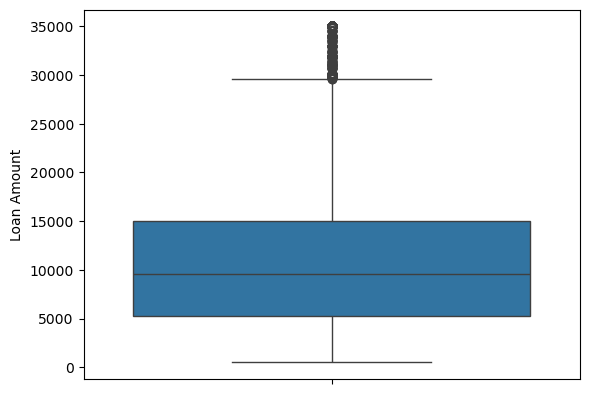

In [145]:
sns.boxplot( y=df1["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

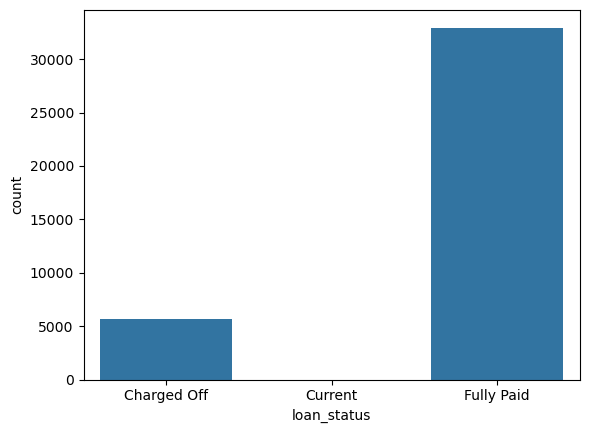

In [147]:
sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

In [149]:
df1["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current            0
Name: count, dtype: int64

#### Inference:

1. Most of the loans are Fully Paid.
2. About 14% of loan are having status as defaulters.
3. We have a class imbalance here.

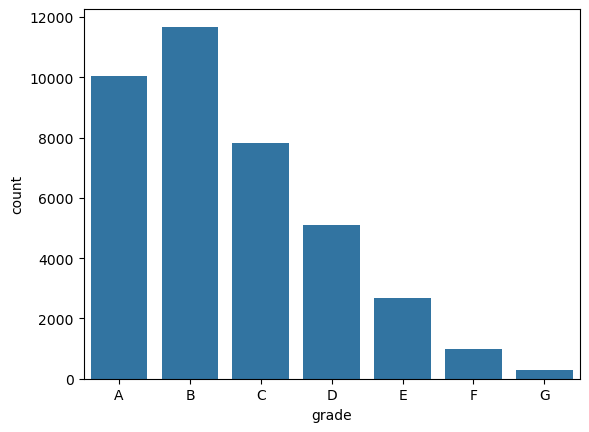

In [152]:
sns.countplot(x='grade', data=df1)
plt.show()

#### Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

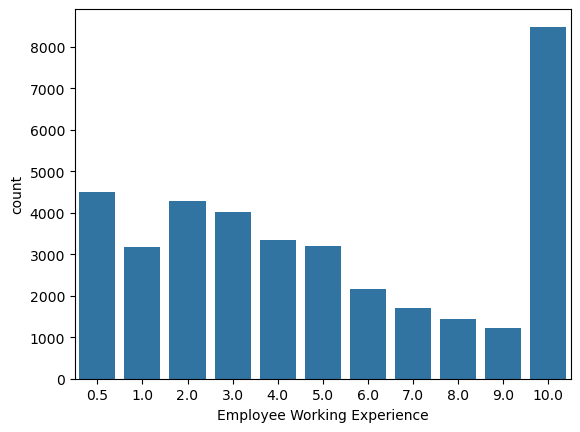

In [155]:
sns.countplot(x='emp_length_years', data=df1)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inference: Majority of employees applying for the loan have more than 10 years of experience

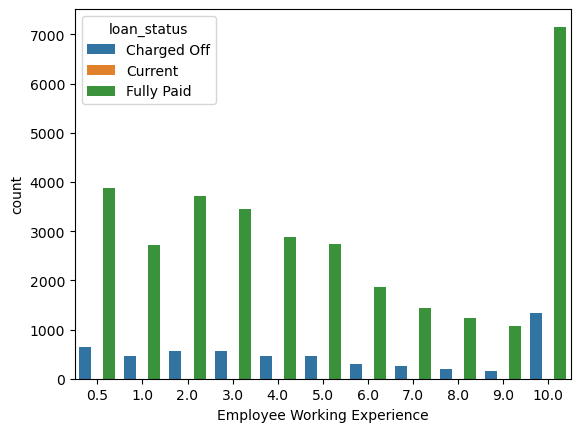

In [160]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df1)
plt.xlabel('Employee Working Experience')
plt.show()

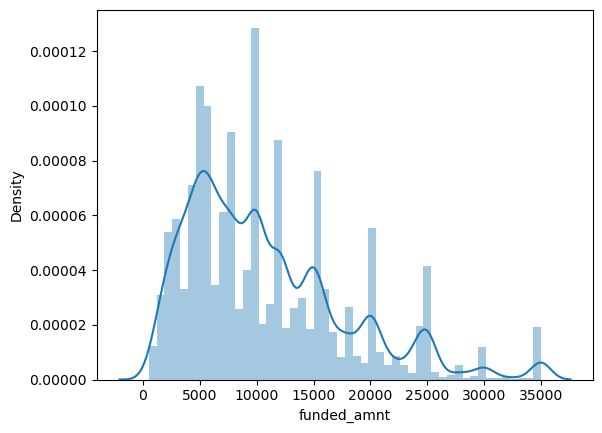

In [164]:
sns.distplot(df1['funded_amnt'])
plt.show()

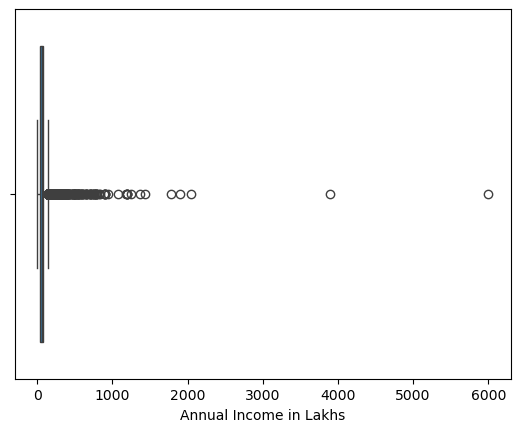

In [166]:
sns.boxplot(x=df1['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

### Inference: There are only two applicants having annual income of more than 30 lakhs

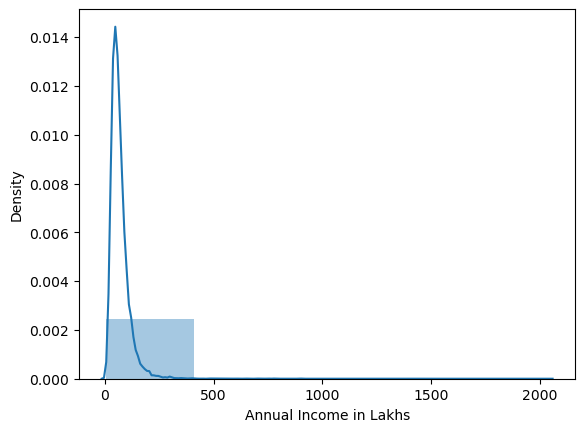

In [169]:
sns.distplot(df1[df1['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

### Inference: Majority of loan applicants have income less than 5 lakhs

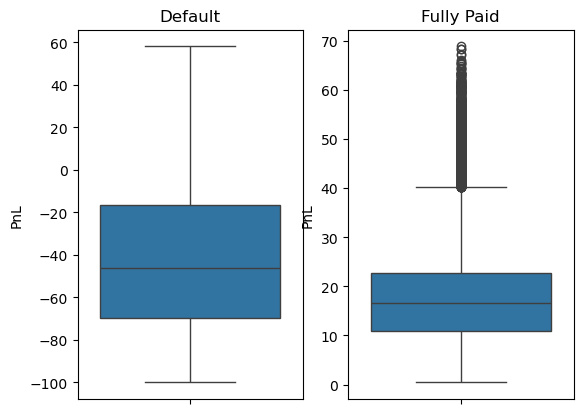

In [172]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df1[df1.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df1[df1.loan_status=='Fully Paid'].PnL)
plt.show()

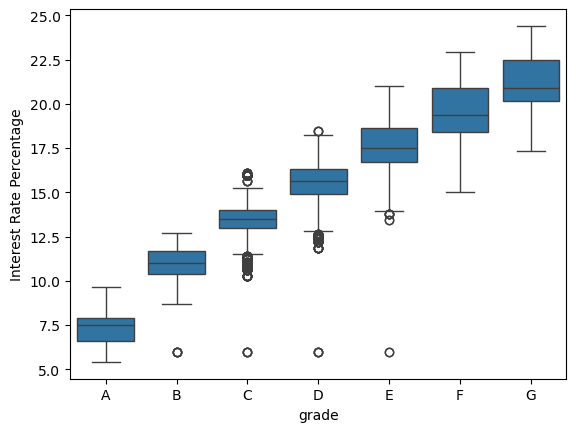

In [174]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df1)
plt.ylabel('Interest Rate Percentage')
plt.show()

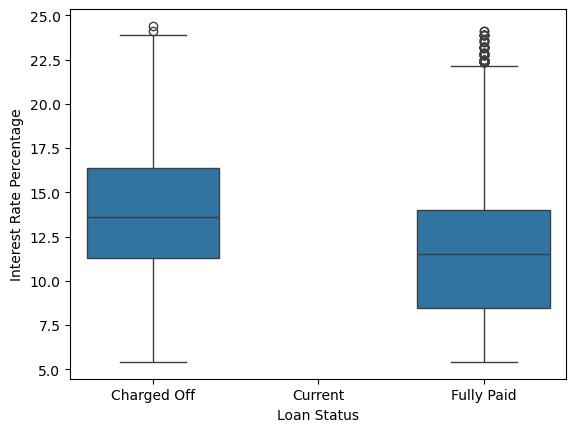

In [176]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df1)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

### Segmented Univariate Analysis

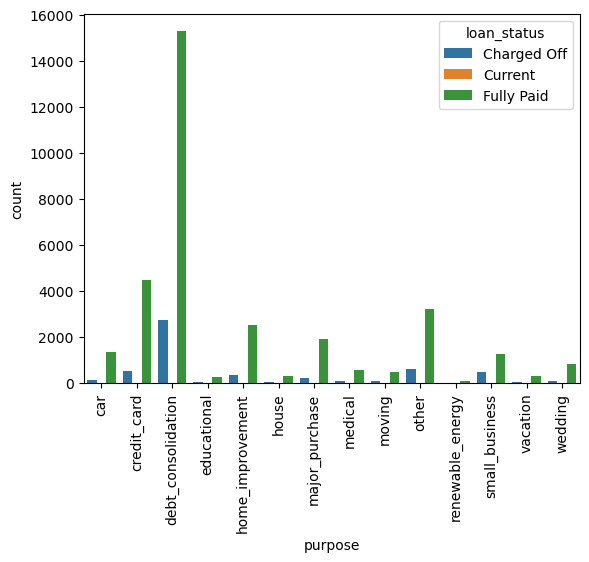

In [179]:
sns.countplot(x='purpose', hue="loan_status", data=df1)
plt.xticks(rotation=90)
plt.show()

#### Inference: Majority of loan has been given for the debt consolidation purpose and has been fully paid.

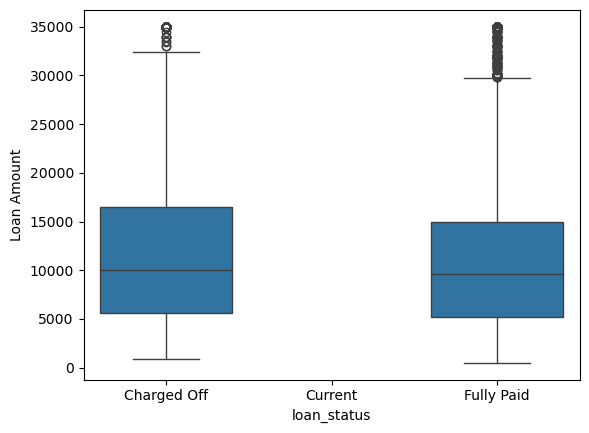

In [182]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df1)
plt.ylabel('Loan Amount')
plt.show()

### Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

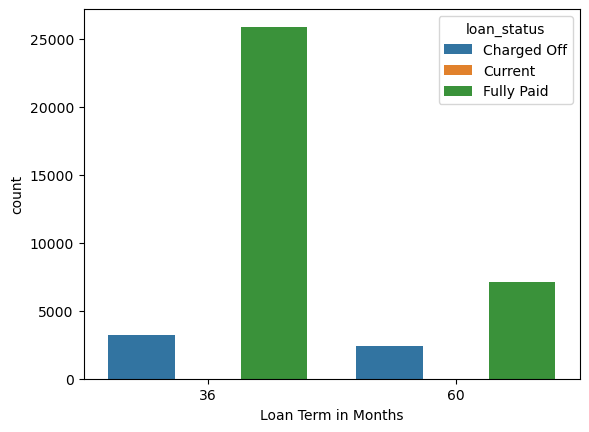

In [185]:
sns.countplot( x="term_months", hue='loan_status', data=df1)
plt.xlabel('Loan Term in Months')
plt.show()

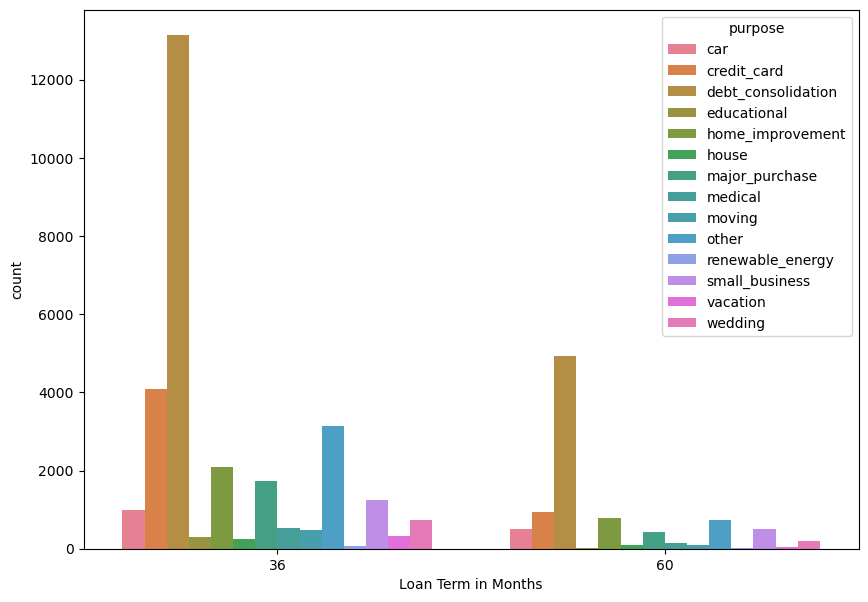

In [187]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df1)
plt.xlabel('Loan Term in Months')
plt.show()

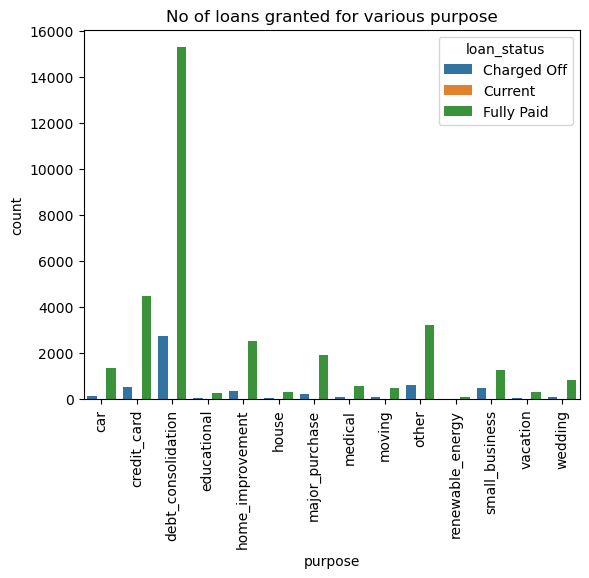

In [189]:
sns.countplot(x='purpose', hue='loan_status', data=df1)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

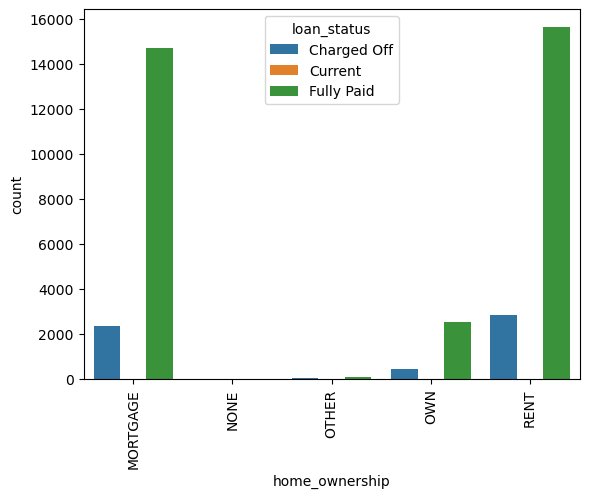

In [191]:
sns.countplot(x='home_ownership',hue='loan_status', data=df1)
plt.xticks(rotation=90)
plt.show()

## Bivariate Plots

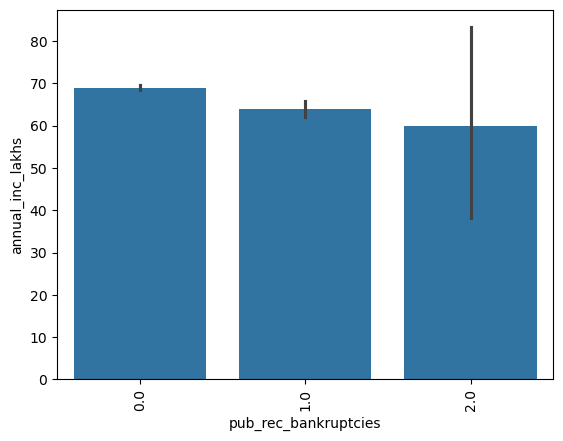

In [194]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df1)
plt.xticks(rotation=90)
plt.show()

In [200]:
del numeric_data['out_prncp']
del numeric_data['out_prncp_inv']

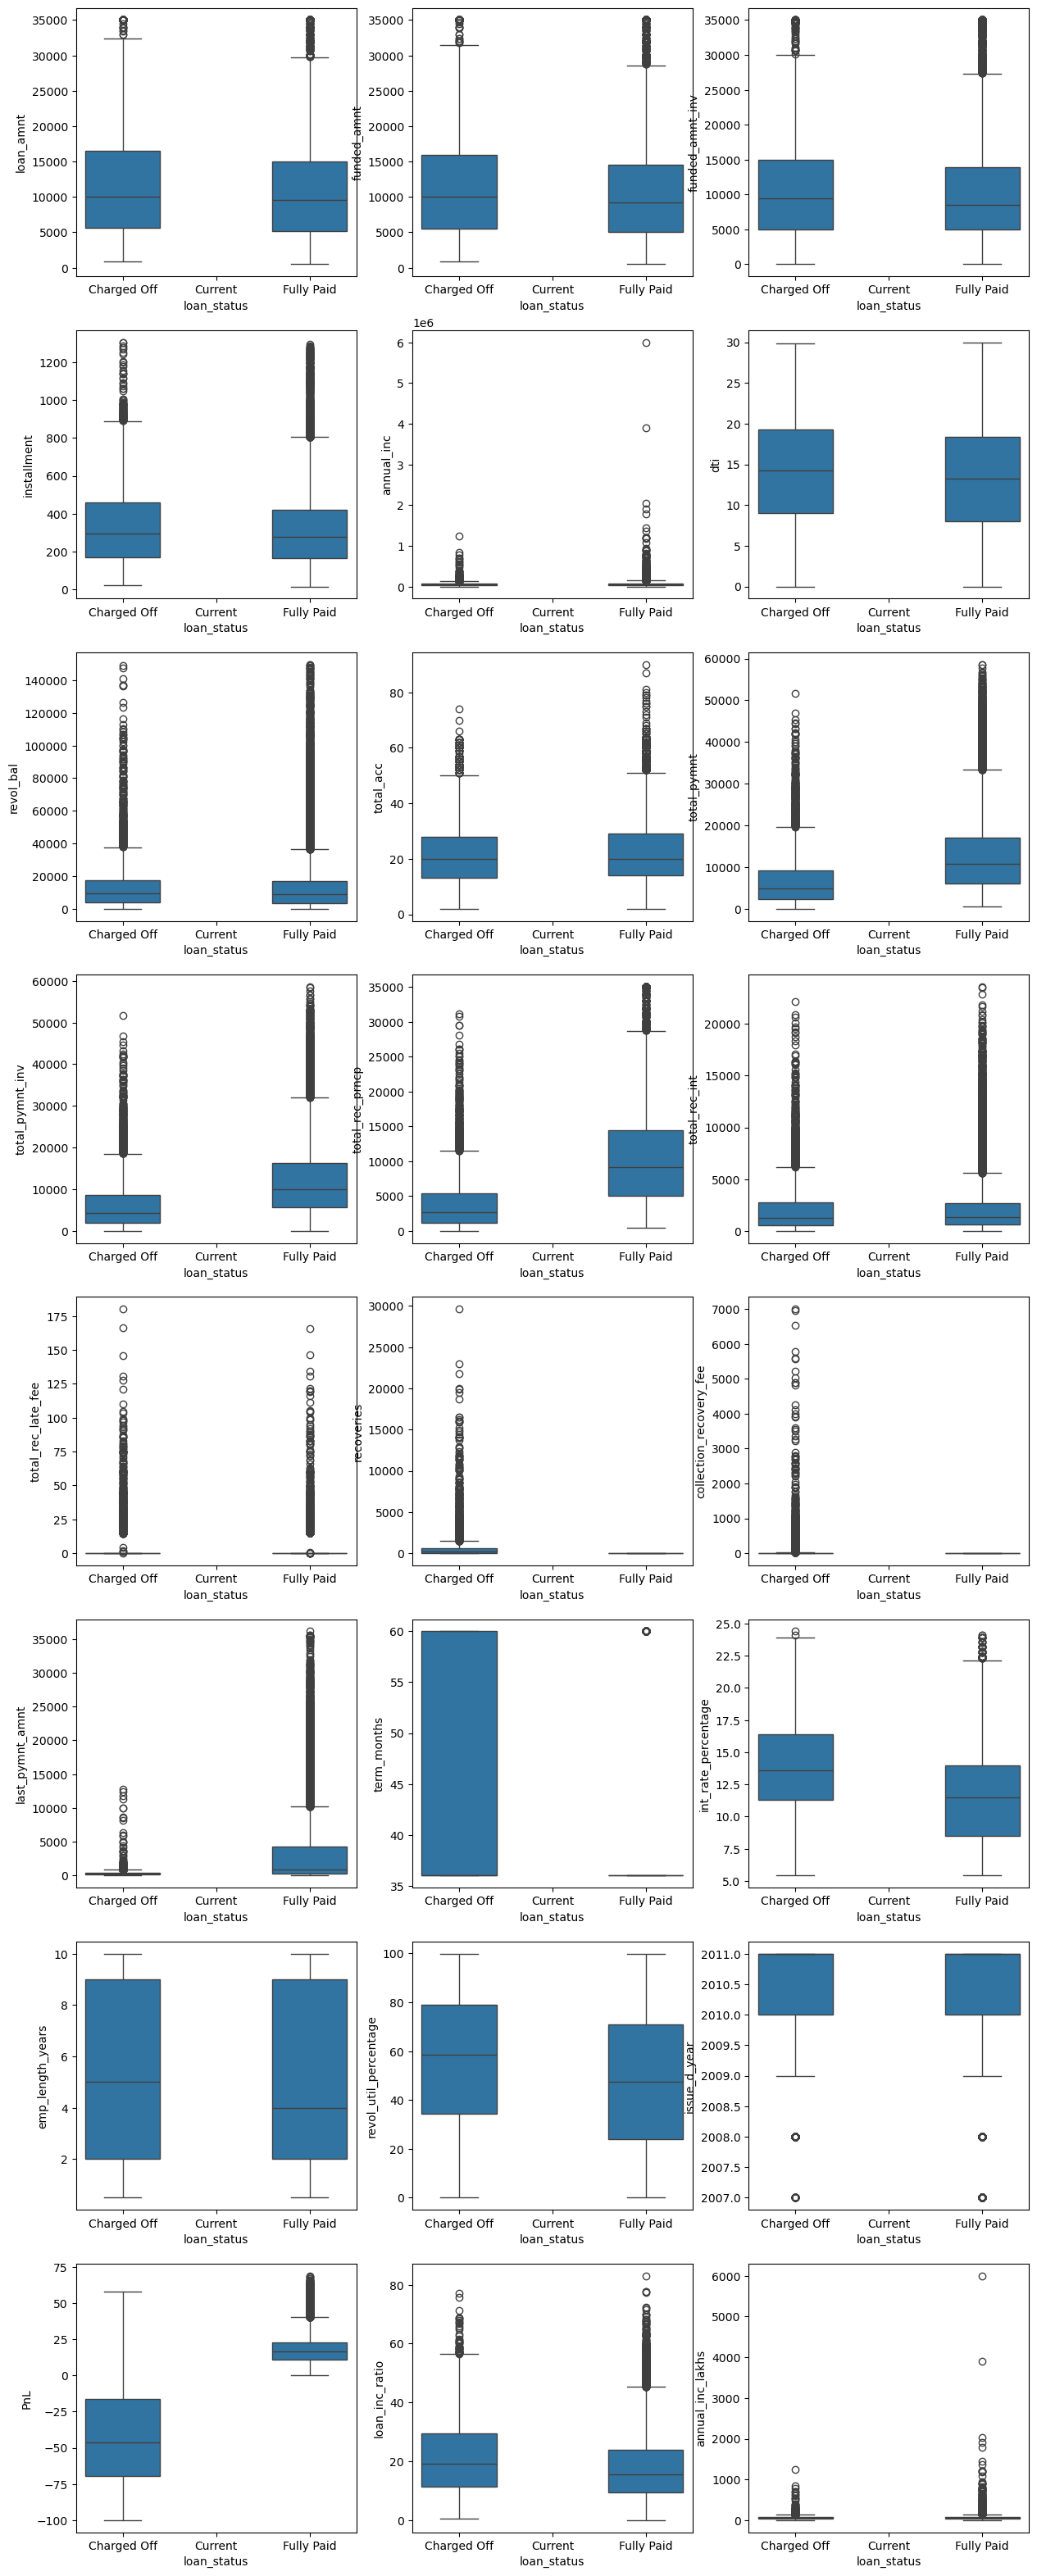

In [202]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df1)

plt.show()

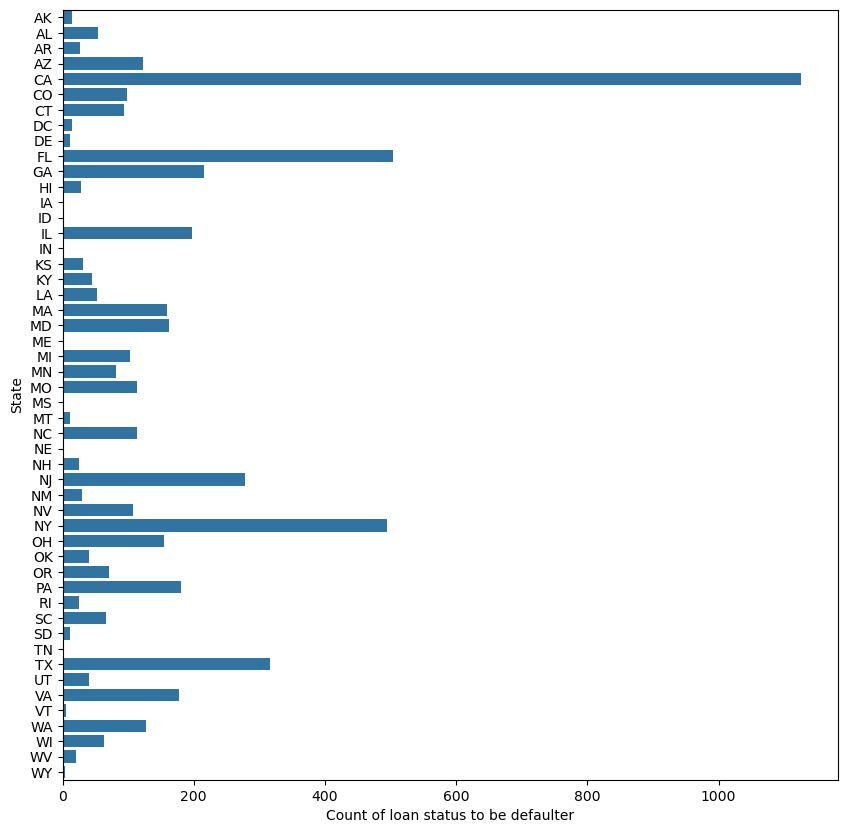

In [204]:
g = df1[df1['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

#### Inference: Applicants from the state CA are having high probability to be default

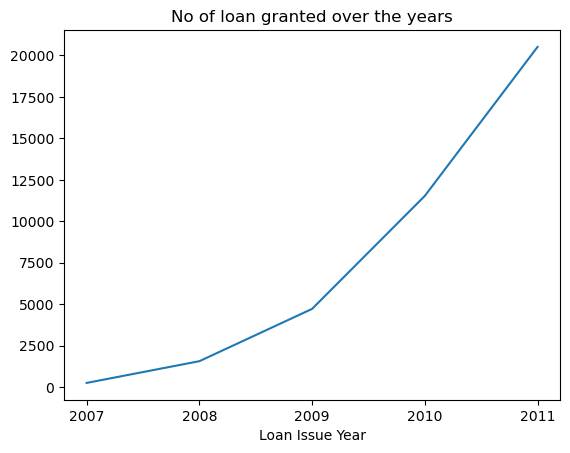

In [207]:
g = df1.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

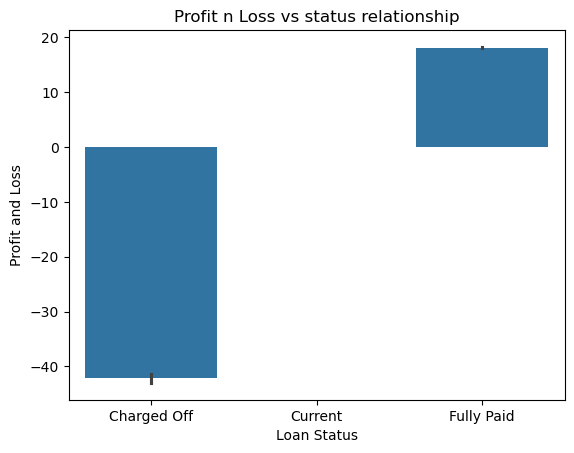

In [209]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df1)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

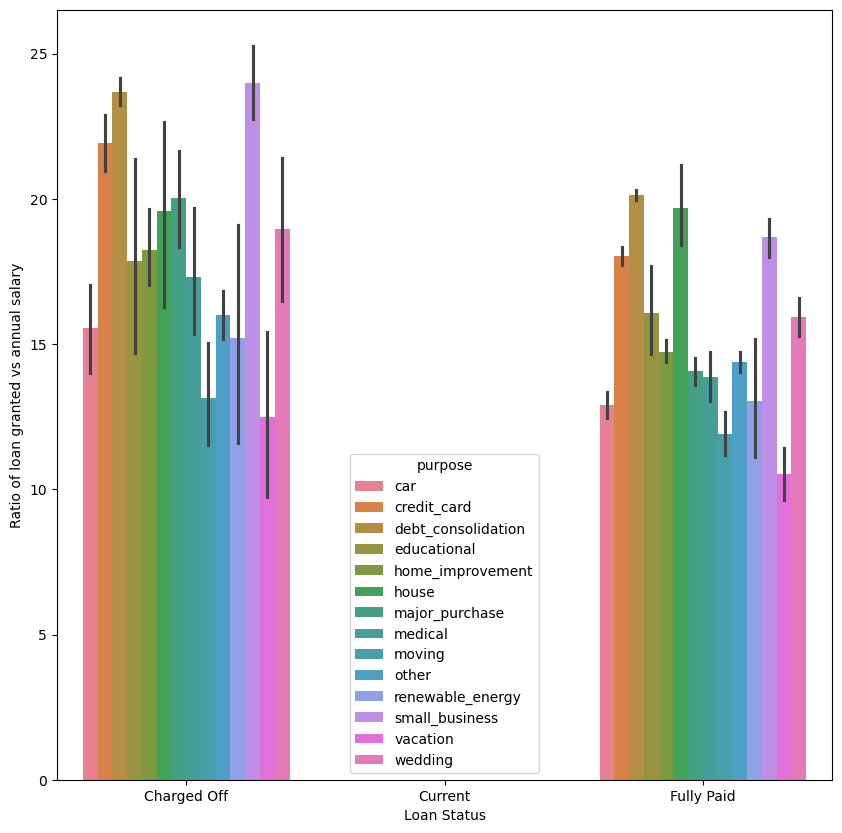

In [211]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df1)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [213]:
df_agg = df1[df1['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

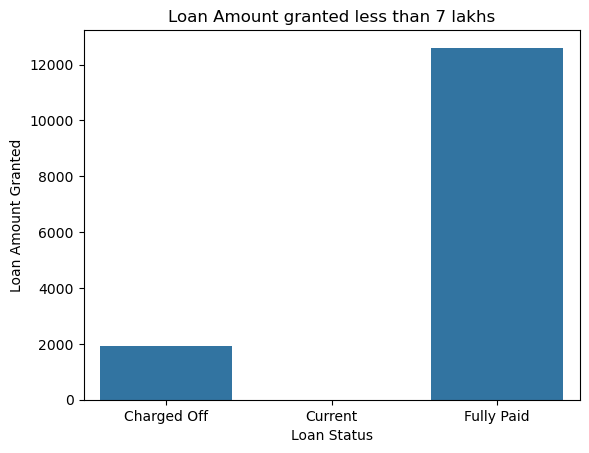

In [215]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [217]:
# Filtering all the numerical values to understand their correlation
laons_corr_df = df1.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
loan_amnt,1.000,0.982,0.938,0.932,0.269,0.062
funded_amnt,0.982,1.000,0.956,0.958,0.265,0.062
funded_amnt_inv,0.938,0.956,1.000,0.905,0.252,0.071
installment,0.932,0.958,0.905,1.000,0.268,0.052
annual_inc,0.269,0.265,0.252,0.268,1.000,-0.122
dti,0.062,0.062,0.071,0.052,-0.122,1.000


### Multivariate Analysis of Variance

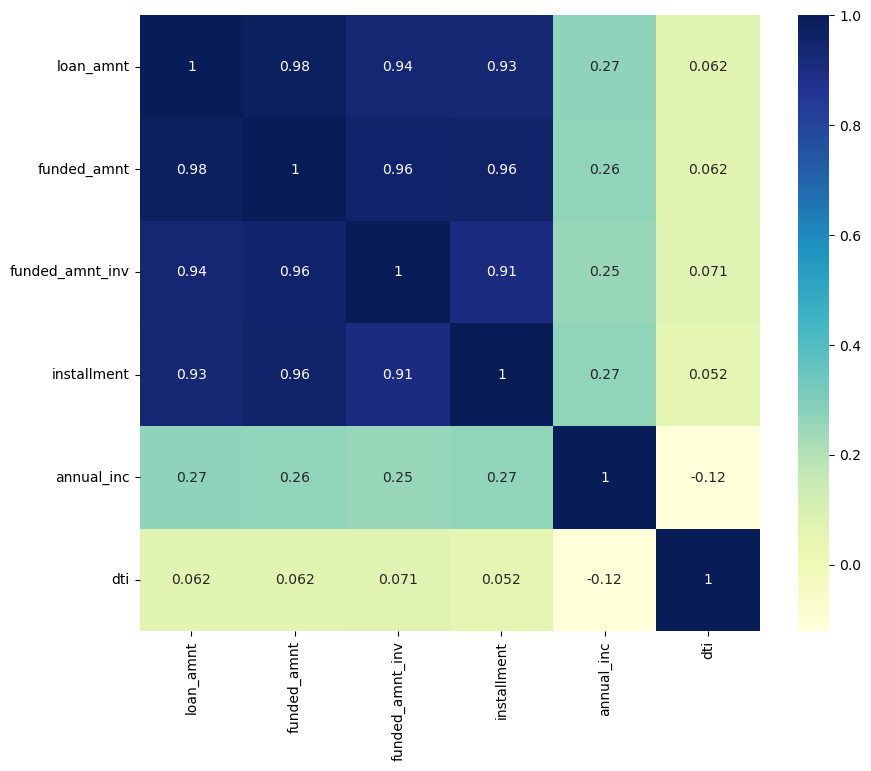

In [220]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()